In [1]:
# Data Preparation and Validation
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read dataset
df_original = pd.read_csv("/kaggle/input/insurance/insurance.csv")

# Display the first few rows of the dataset
print(df_original.head())

# Data Validation
# Step 1: Checking for Missing Values and Data Types
print("Checking for missing values and data types:")
print(df_original.info())

# Step 2: Summary Statistics for Numerical Variables
print("\nSummary statistics for numerical variables:")
print(df_original.describe())

# Step 3: Checking for Data Consistency in Categorical Variables
print("\nUnique values for each categorical variable:")
print("Gender:", df_original['sex'].unique())
print("Smoking Status:", df_original['smoker'].unique())
print("Region:", df_original['region'].unique())

# Step 4: Duplicate Handling
# Check for duplicate rows in the dataset
duplicates = df_original[df_original.duplicated(keep=False)]
print("\nDuplicated rows:")
print(duplicates.reset_index())

# Remove duplicated rows, keeping the first occurrence
df = df_original.drop_duplicates()

# Print the number of records after removing duplicates
print(f"\nNumber of records after removing duplicates: {df.shape[0]}")


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Checking for missing values and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary statistics for numerical variables:
  

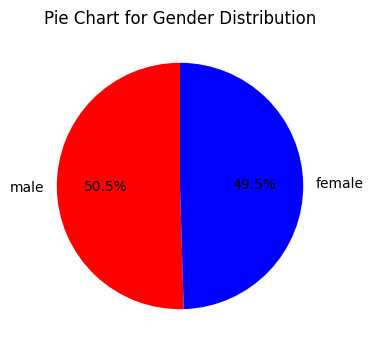

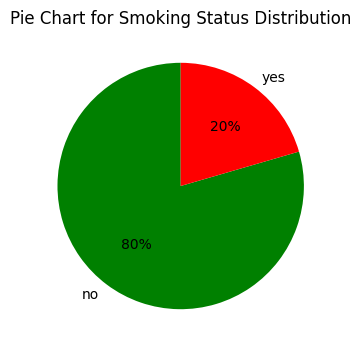

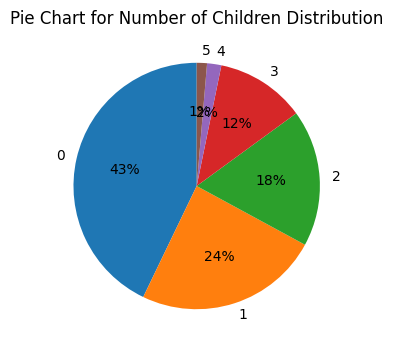

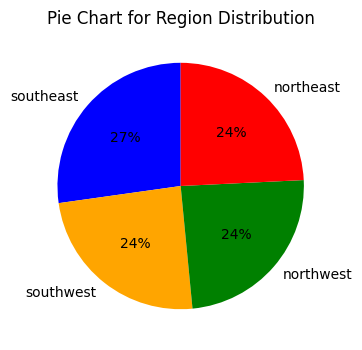

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


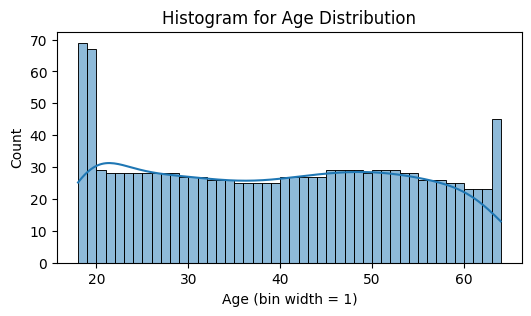

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


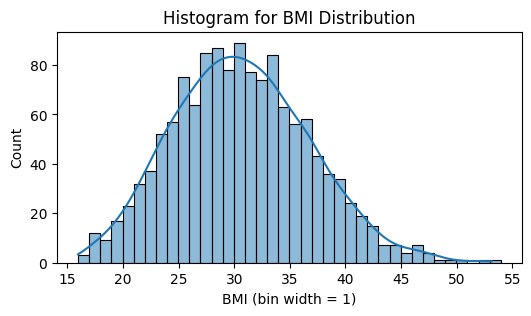

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


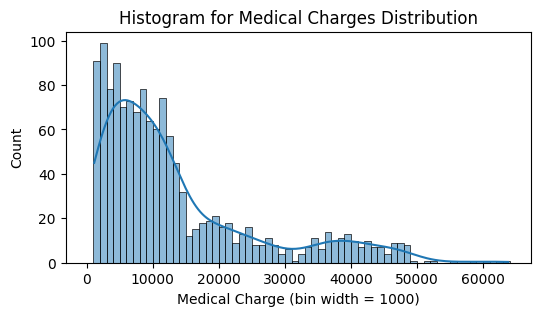

In [2]:
# Exploratory Data Analysis
# Step 1: Visualizing Categorical Variables
# Custom function to show percentages and avoid overlapping
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'
    return my_format

# Pie Chart for Gender Distribution
plt.figure(figsize=(4, 4))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue'], startangle=90)
plt.title('Pie Chart for Gender Distribution')
plt.ylabel('')
plt.show()

# Pie Chart for Smoking Status Distribution
plt.figure(figsize=(4, 4))
df['smoker'].value_counts().plot.pie(autopct='%1.0f%%', colors=['green', 'red'], startangle=90)
plt.title('Pie Chart for Smoking Status Distribution')
plt.ylabel('')
plt.show()

# Pie Chart for Number of Children Distribution
plt.figure(figsize=(4, 4))
df['children'].value_counts().plot.pie(autopct='%1.0f%%', startangle=90)
plt.title('Pie Chart for Number of Children Distribution')
plt.ylabel('')
plt.show()

# Pie Chart for Region Distribution
plt.figure(figsize=(4, 4))
df['region'].value_counts().plot.pie(autopct='%1.0f%%', startangle=90, colors=['blue', 'orange', 'green', 'red'])
plt.title('Pie Chart for Region Distribution')
plt.ylabel('')
plt.show()

# Step 2: Visualizing Numerical Variables

# Histogram for Age Distribution
plt.figure(figsize=(6, 3))
bin_edges_age = np.arange(df['age'].min(), df['age'].max() + 1, 1)
sns.histplot(data=df, x='age', bins=bin_edges_age, kde=True)
plt.title('Histogram for Age Distribution')
plt.xlabel('Age (bin width = 1)')
plt.ylabel('Count')
plt.show()

# Histogram for BMI Distribution
plt.figure(figsize=(6, 3))
bin_edges_bmi = np.arange(df['bmi'].min(), df['bmi'].max() + 1, 1)
sns.histplot(data=df, x='bmi', bins=bin_edges_bmi, kde=True)
plt.title('Histogram for BMI Distribution')
plt.xlabel('BMI (bin width = 1)')
plt.ylabel('Count')
plt.show()

# Histogram for Medical Charges Distribution
plt.figure(figsize=(6, 3))
bin_edges_charges = np.arange(0, df['charges'].max() + 1000, 1000)
sns.histplot(data=df, x='charges', bins=bin_edges_charges, kde=True)
plt.title('Histogram for Medical Charges Distribution')
plt.xlabel('Medical Charge (bin width = 1000)')
plt.ylabel('Count')
plt.show()



Label Mapping for sex:
{'female': 0, 'male': 1}

Label Mapping for smoker:
{'no': 0, 'yes': 1}

Label Mapping for region:
{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


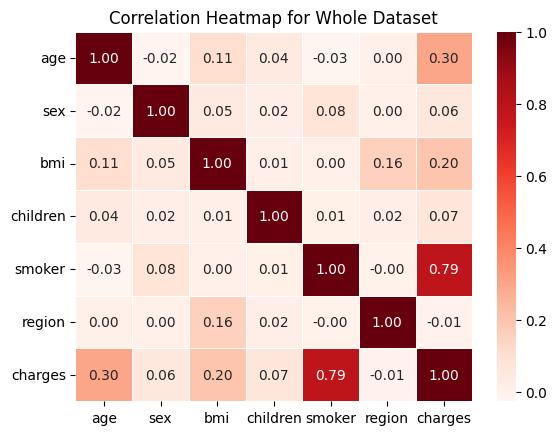

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

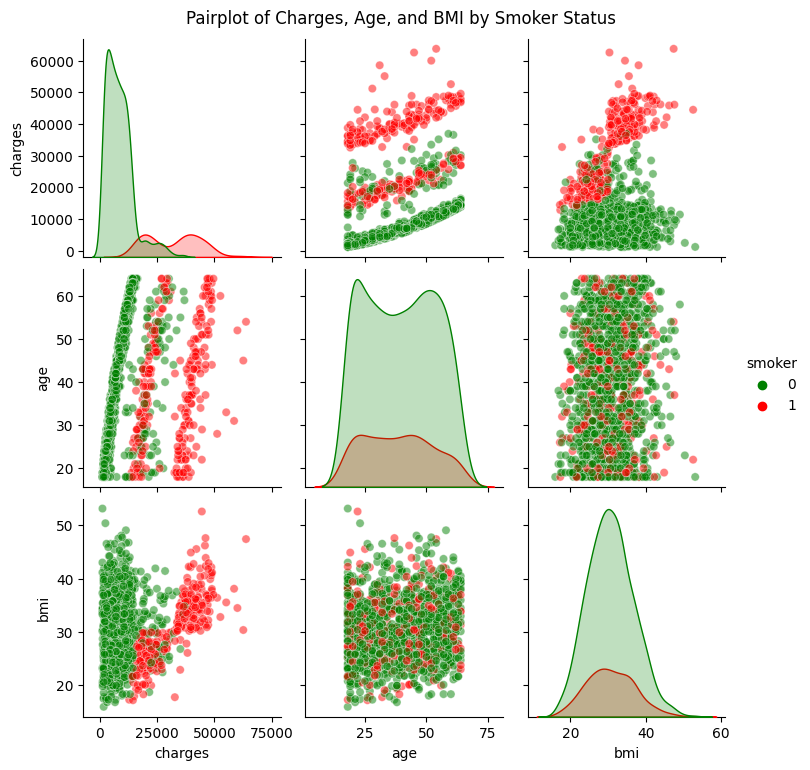

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


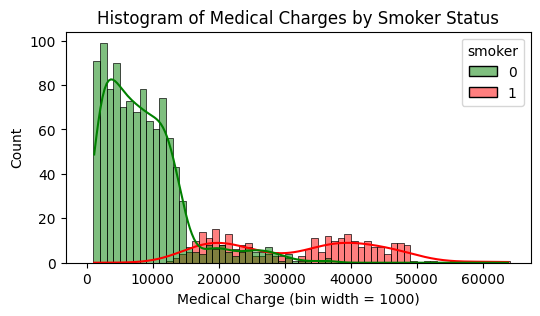

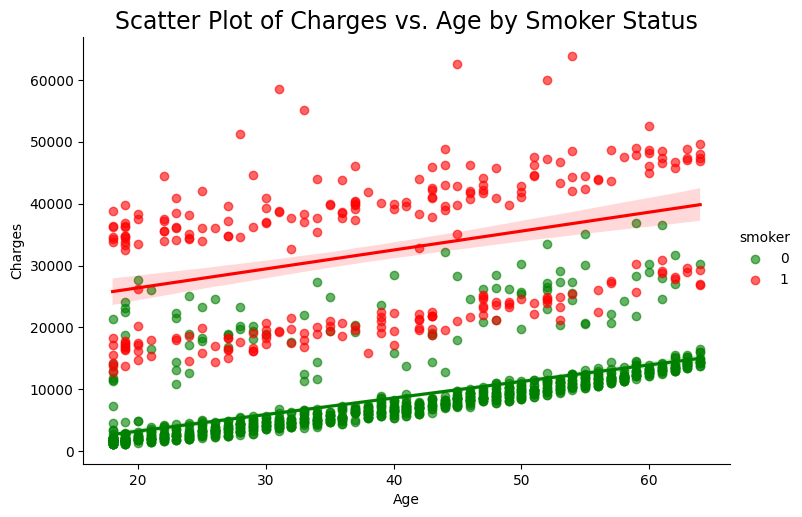

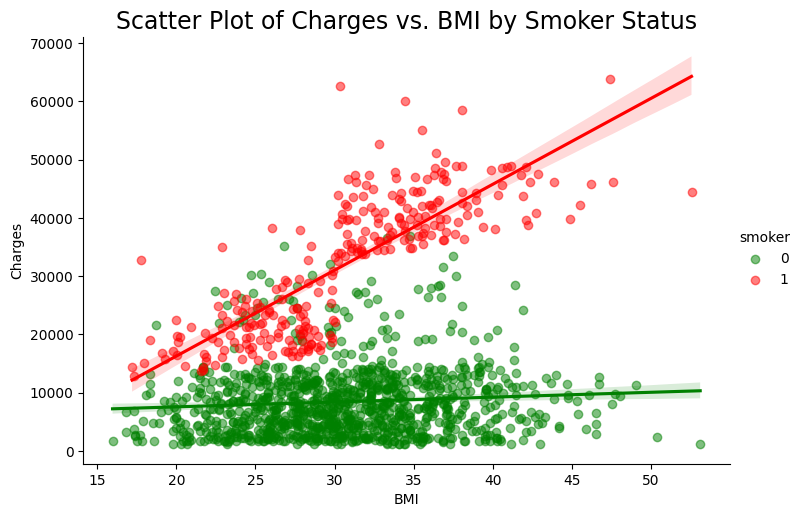

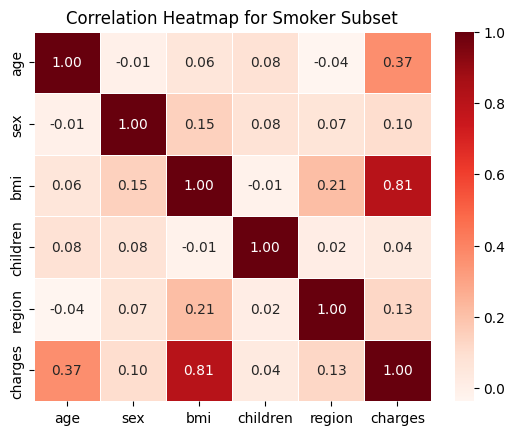

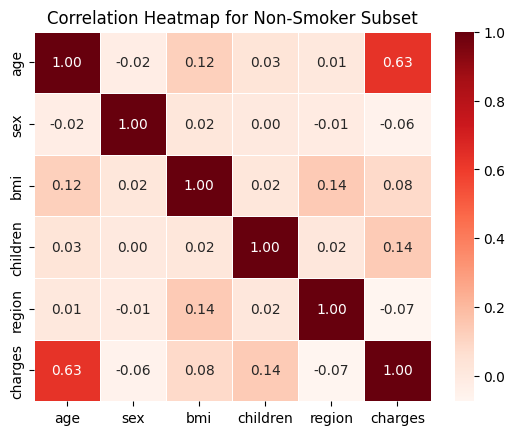

In [3]:
# Correlation Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset and remove duplicates
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df = df.drop_duplicates()

# Encode categorical variables for correlation analysis
le = LabelEncoder()

# Fit and transform the categorical values

# sex
df['sex'] = le.fit_transform(df['sex'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Mapping for sex:")
print(label_mapping)

# smoker
df['smoker'] = le.fit_transform(df['smoker'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Mapping for smoker:")
print(label_mapping)

# region
df['region'] = le.fit_transform(df['region'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Mapping for region:")
print(label_mapping)

# Heatmap of correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Reds', linewidths=.5)
plt.title('Correlation Heatmap for Whole Dataset')
plt.show()

# Pairplot of charges, age, and bmi by smoker status
sns.pairplot(df, vars=['charges', 'age', 'bmi'], hue='smoker', palette={0: 'green', 1: 'red'}, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Charges, Age, and BMI by Smoker Status', y=1.02)
plt.show()

# Histogram of charges by smoker status
plt.figure(figsize=(6, 3))
bin_edges_charges = np.arange(0, df['charges'].max() + 1000, 1000)
sns.histplot(data=df, x='charges', bins=bin_edges_charges, hue='smoker', kde=True, palette=['green', 'red'])
plt.title('Histogram of Medical Charges by Smoker Status')
plt.xlabel('Medical Charge (bin width = 1000)')
plt.ylabel('Count')
plt.show()


# Scatter plot of charges vs. age by smoker status
sns.lmplot(data=df, x='age', y='charges', hue='smoker', palette={0: 'green', 1: 'red'}, aspect=1.5, scatter_kws={'alpha': 0.6})
plt.title('Scatter Plot of Charges vs. Age by Smoker Status', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Scatter plot of charges vs. bmi by smoker status
sns.lmplot(x='bmi', y='charges', hue='smoker', palette={0: 'green', 1: 'red'}, data=df, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Charges vs. BMI by Smoker Status', fontsize=17)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Correlation Analysis for Smokers and Non-smokers Subsets
# Heatmap of correlation matrix for smoker subset
df_s = df[df['smoker'] == 1][['age', 'sex', 'bmi', 'children', 'region', 'charges']]
correlation_matrix_s = df_s.corr()
sns.heatmap(correlation_matrix_s, annot=True, fmt='.2f', cmap='Reds', linewidths=.5)
plt.title('Correlation Heatmap for Smoker Subset')
plt.show()

# Heatmap of correlation matrix for non-smoker subset
df_ns = df[df['smoker'] == 0][['age', 'sex', 'bmi', 'children', 'region', 'charges']]
correlation_matrix_ns = df_ns.corr()
sns.heatmap(correlation_matrix_ns, annot=True, fmt='.2f', cmap='Reds', linewidths=.5)
plt.title('Correlation Heatmap for Non-Smoker Subset')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

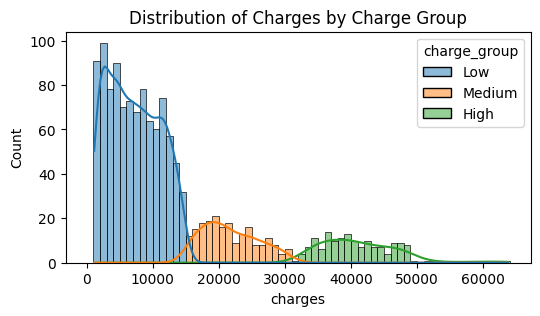

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

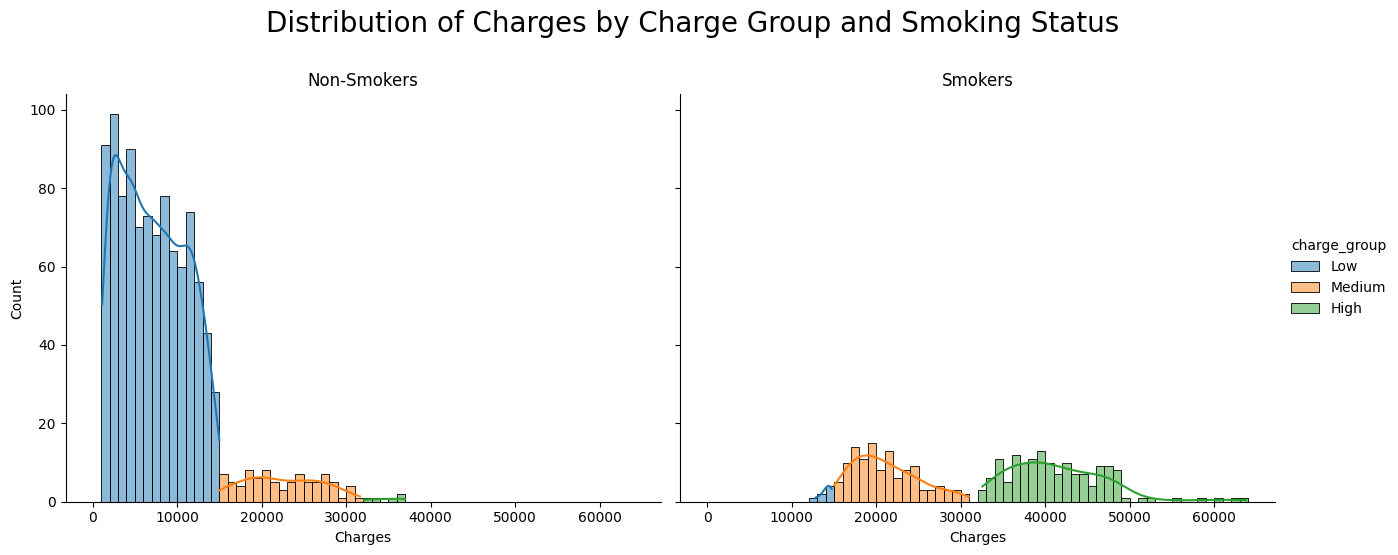

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

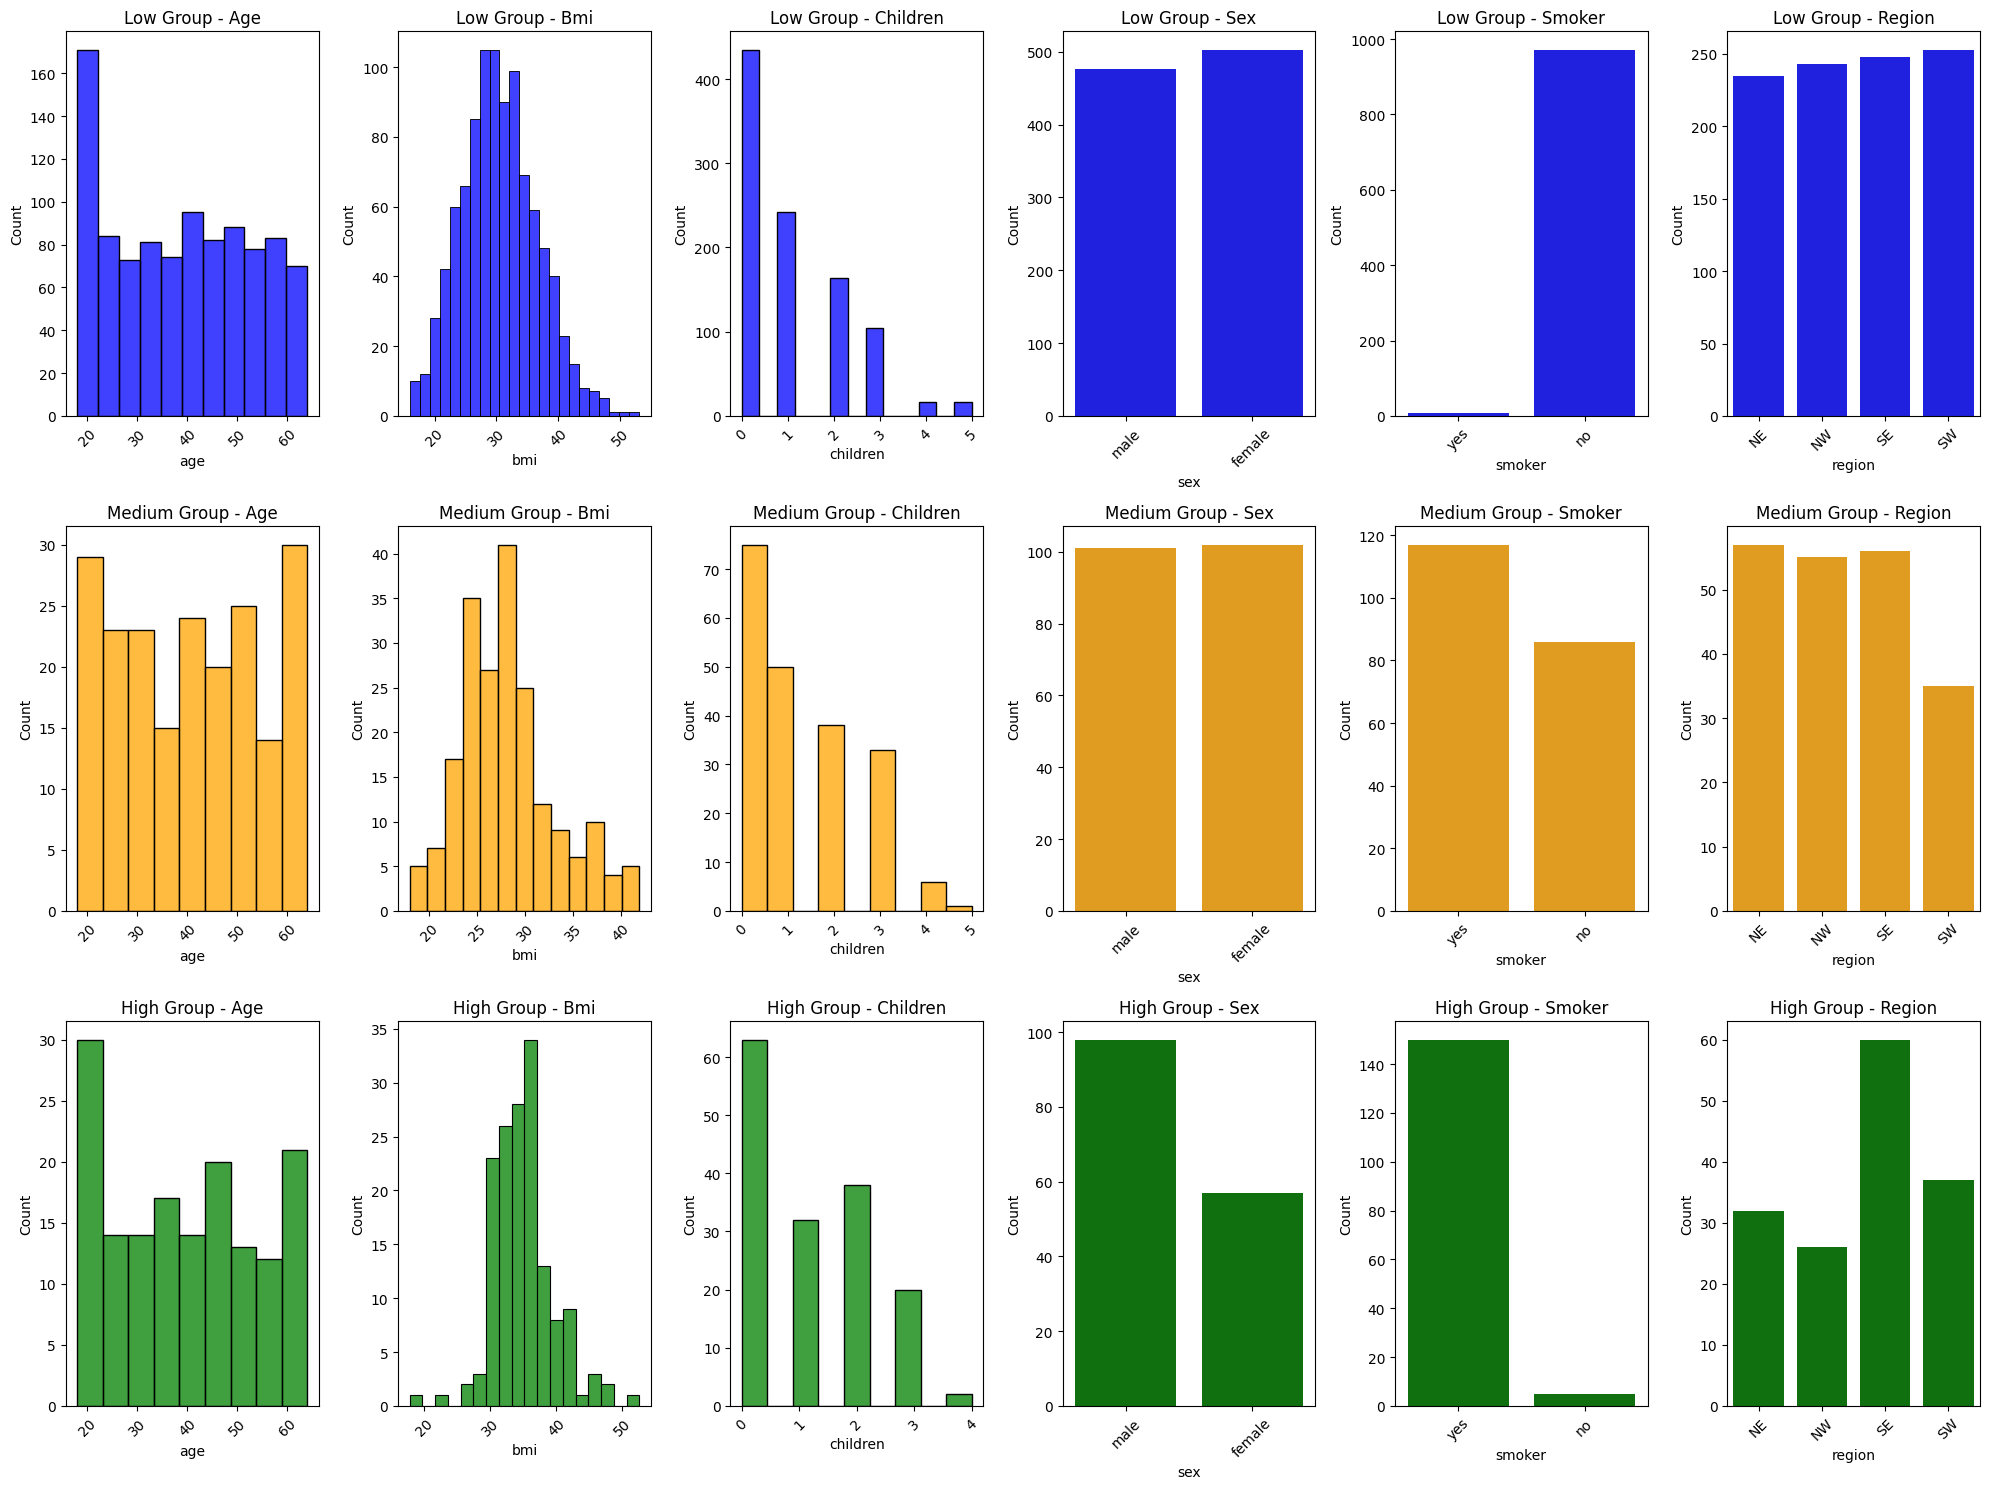

In [4]:
# Segmentation and Statistical Analysis part 1- Segmentation Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, chi2_contingency

# Load the dataset and remove duplicates
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df = df.drop_duplicates()

# Define cutoffs for charge groups
low_charge_cutoff = 15000
high_charge_cutoff = 32000

# Assign each record to a charge group based on the defined ranges
df['charge_group'] = pd.cut(df['charges'], bins=[-np.inf, low_charge_cutoff, high_charge_cutoff, np.inf], labels=['Low', 'Medium', 'High'])

# Define the bin edges from 0 to the maximum charge, with each bin being 1000 units wide
bin_edges = np.arange(0, df['charges'].max() + 1000, 1000)

# Visualize the distribution of charges by group with specified bin edges
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='charges', hue='charge_group', kde=True, hue_order=['Low', 'Medium', 'High'], bins=bin_edges, alpha=0.5)
plt.title('Distribution of Charges by Charge Group')
plt.show()

# Create a FacetGrid to plot the distribution of charges by group and smoking status
g = sns.FacetGrid(df, col="smoker", hue="charge_group", hue_order=['Low', 'Medium', 'High'], height=5, aspect=1.3, col_order=['no', 'yes'])
g.map(sns.histplot, "charges", bins=bin_edges, kde=True, alpha=0.5).add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Charges", "Count")

# Set custom titles for each subplot
for ax, title in zip(g.axes.flat, ['Non-Smokers', 'Smokers']):
    ax.set_title(title)

g.fig.suptitle('Distribution of Charges by Charge Group and Smoking Status', y=1.1,  fontsize=20)
plt.show()

# Abbreviate region labels
df['region'] = df['region'].map({
    'northeast': 'NE',
    'northwest': 'NW',
    'southeast': 'SE',
    'southwest': 'SW'
})

# Ensure 'smoker' is correctly mapped
df['smoker'] = df['smoker'].map({'yes': 'yes', 'no': 'no'})

# Ensure consistent ordering for categorical variables
sex_order = ['male', 'female']
smoker_order = ['yes', 'no']
region_order = ['NE', 'NW', 'SE', 'SW']

# Create separate DataFrames for each group
low_group = df[df['charge_group'] == 'Low']
medium_group = df[df['charge_group'] == 'Medium']
high_group = df[df['charge_group'] == 'High']

# Define the features to plot
features = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']

# Plot the distribution of features within each group
fig, axes = plt.subplots(nrows=3, ncols=len(features), figsize=(20, 15))

for i, column in enumerate(features):
    if column in ['sex', 'smoker', 'region']:
        sns.countplot(x=column, data=low_group, ax=axes[0, i], color='blue', order=eval(f"{column}_order"))
        sns.countplot(x=column, data=medium_group, ax=axes[1, i], color='orange', order=eval(f"{column}_order"))
        sns.countplot(x=column, data=high_group, ax=axes[2, i], color='green', order=eval(f"{column}_order"))
    else:
        sns.histplot(low_group[column], kde=False, ax=axes[0, i], color='blue')
        sns.histplot(medium_group[column], kde=False, ax=axes[1, i], color='orange')
        sns.histplot(high_group[column], kde=False, ax=axes[2, i], color='green')
    
    axes[0, i].set_title(f'Low Group - {column.title()}')
    axes[0, i].set_ylabel('Count')
    axes[1, i].set_title(f'Medium Group - {column.title()}')
    axes[1, i].set_ylabel('Count')
    axes[2, i].set_title(f'High Group - {column.title()}')
    axes[2, i].set_ylabel('Count')
    
    # Rotate x-axis labels for readability
    for ax in axes[:, i]:
        ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [5]:
# Segmentation and Statistical Analysis part 2 - Statistical Analysis

import pandas as pd
import scipy.stats as stats

# Load the dataset and remove duplicates
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df = df.drop_duplicates()

# Define cutoffs for charge groups
low_charge_cutoff = 15000
high_charge_cutoff = 32000

# Assign each record to a charge group based on the defined ranges
df['charge_group'] = pd.cut(df['charges'], bins=[-np.inf, low_charge_cutoff, high_charge_cutoff, np.inf], labels=['Low', 'Medium', 'High'])


# Verify the distribution of groups
print(df['charge_group'].value_counts())

# Create separate DataFrames for the groups
low_cost_non_smokers = df[(df['charge_group'] == 'Low') & (df['smoker'] == 'no')]
medium_cost_non_smokers = df[(df['charge_group'] == 'Medium') & (df['smoker'] == 'no')]
medium_cost_smokers = df[(df['charge_group'] == 'Medium') & (df['smoker'] == 'yes')]
high_cost_smokers = df[(df['charge_group'] == 'High') & (df['smoker'] == 'yes')]

# Define the features to compare
features = ['age', 'bmi', 'children', 'sex', 'region']

# Function to perform normality and variance tests
def check_assumptions(group1, group2):
    # Shapiro-Wilk test for normality
    normality1 = stats.shapiro(group1)
    normality2 = stats.shapiro(group2)
    
    # Levene's test for homogeneity of variances
    variance = stats.levene(group1, group2)
    
    return normality1, normality2, variance

# Function to perform t-tests or non-parametric tests based on assumptions
def perform_tests(group1, group2):
    normality1, normality2, variance = check_assumptions(group1, group2)
    assumptions_met = (normality1.pvalue > 0.05) and (normality2.pvalue > 0.05) and (variance.pvalue > 0.05)
    
    if assumptions_met:
        # Perform t-test if assumptions are met
        test_type = "t-test"
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)
    else:
        # Perform Mann-Whitney U test if assumptions are not met
        test_type = "Mann-Whitney U test"
        t_stat, p_value = stats.mannwhitneyu(group1, group2)
    
    return test_type, t_stat, p_value, assumptions_met, normality1.pvalue, normality2.pvalue, variance.pvalue

# Function to perform chi-square tests for categorical variables
def perform_chi_square(group1, group2, feature_name):
    # Combine groups into a single DataFrame
    combined = pd.concat([group1, group2], keys=['Low', 'Medium']).reset_index(level=0)
    combined.columns = ['charge_group', feature_name]
    
    # Create a contingency table
    contingency_table = pd.crosstab(combined[feature_name], combined['charge_group'])
    print("\nContingency Table for", feature_name)
    print(contingency_table)  # Debug: print contingency table
    if contingency_table.size == 0:
        raise ValueError("No data; `observed` has size 0.")
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p

# Function to ensure groups have at least 3 samples before performing tests
def ensure_minimum_samples(group1, group2):
    return len(group1) >= 3 and len(group2) >= 3

# Results dictionaries
results_non_smokers = {}
results_smokers = {}

# Perform tests for each feature for non-smokers
print("Non-Smokers (Low vs. Medium Cost Groups):")

for feature in features:
    if feature in ['sex', 'region']:
        group1 = low_cost_non_smokers[feature]
        group2 = medium_cost_non_smokers[feature]
        if ensure_minimum_samples(group1, group2):
            try:
                chi2, p_value = perform_chi_square(group1, group2, feature)
                results_non_smokers[feature] = {
                    'test_type': 'chi-square test', 
                    'chi2': chi2, 
                    'p_value': p_value
                }
                print(f"{feature}: {results_non_smokers[feature]}")
            except ValueError as e:
                print(f"Error with {feature}: {e}")
    else:
        group1 = low_cost_non_smokers[feature].dropna()
        group2 = medium_cost_non_smokers[feature].dropna()
        if ensure_minimum_samples(group1, group2):
            test_type, t_stat, p_value, assumptions_met, p_normality1, p_normality2, p_variance = perform_tests(group1, group2)
            results_non_smokers[feature] = {
                'test_type': test_type, 
                't_stat': t_stat, 
                'p_value': p_value, 
                'assumptions_met': assumptions_met, 
                'p_normality1': p_normality1, 
                'p_normality2': p_normality2, 
                'p_variance': p_variance
            }
            print(f"{feature}: {results_non_smokers[feature]}")

# Perform tests for each feature for smokers
print("\nSmokers (Medium vs. High Cost Groups):")

for feature in features:
    if feature in ['sex', 'region']:
        group1 = medium_cost_smokers[feature]
        group2 = high_cost_smokers[feature]
        if ensure_minimum_samples(group1, group2):
            try:
                chi2, p_value = perform_chi_square(group1, group2, feature)
                results_smokers[feature] = {
                    'test_type': 'chi-square test', 
                    'chi2': chi2, 
                    'p_value': p_value
                }
                print(f"{feature}: {results_smokers[feature]}")
            except ValueError as e:
                print(f"Error with {feature}: {e}")
    else:
        group1 = medium_cost_smokers[feature].dropna()
        group2 = high_cost_smokers[feature].dropna()
        if ensure_minimum_samples(group1, group2):
            test_type, t_stat, p_value, assumptions_met, p_normality1, p_normality2, p_variance = perform_tests(group1, group2)
            results_smokers[feature] = {
                'test_type': test_type, 
                't_stat': t_stat, 
                'p_value': p_value, 
                'assumptions_met': assumptions_met, 
                'p_normality1': p_normality1, 
                'p_normality2': p_normality2, 
                'p_variance': p_variance
            }
            print(f"{feature}: {results_smokers[feature]}")


charge_group
Low       979
Medium    203
High      155
Name: count, dtype: int64
Non-Smokers (Low vs. Medium Cost Groups):
age: {'test_type': 'Mann-Whitney U test', 't_stat': 34642.5, 'p_value': 0.008427980500848427, 'assumptions_met': False, 'p_normality1': 1.3077480432206899e-18, 'p_normality2': 2.3889469957794063e-05, 'p_variance': 0.18600081321628212}
bmi: {'test_type': 'Mann-Whitney U test', 't_stat': 37457.0, 'p_value': 0.11018587786322324, 'assumptions_met': False, 'p_normality1': 0.00024008931359276175, 'p_normality2': 0.3105660080909729, 'p_variance': 0.16770427579823444}
children: {'test_type': 'Mann-Whitney U test', 't_stat': 35302.0, 'p_value': 0.011601933063324202, 'assumptions_met': False, 'p_normality1': 2.9890211743951946e-32, 'p_normality2': 4.7627597155042167e-07, 'p_variance': 0.36479057429595674}

Contingency Table for sex
charge_group  Low  Medium
sex                      
female        498      45
male          474      41
sex: {'test_type': 'chi-square test', 'ch

charge_group
Low       979
Medium    203
High      155
Name: count, dtype: int64
Final Model Accuracy without Feature Engineering: 0.9251700680272109
Confusion Matrix without Feature Engineering:
[[190   2   4]
 [  0 189   7]
 [  0  31 165]]
Final Classification Report without Feature Engineering:
              precision    recall  f1-score   support

        High       1.00      0.97      0.98       196
         Low       0.85      0.96      0.90       196
      Medium       0.94      0.84      0.89       196

    accuracy                           0.93       588
   macro avg       0.93      0.93      0.93       588
weighted avg       0.93      0.93      0.93       588



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


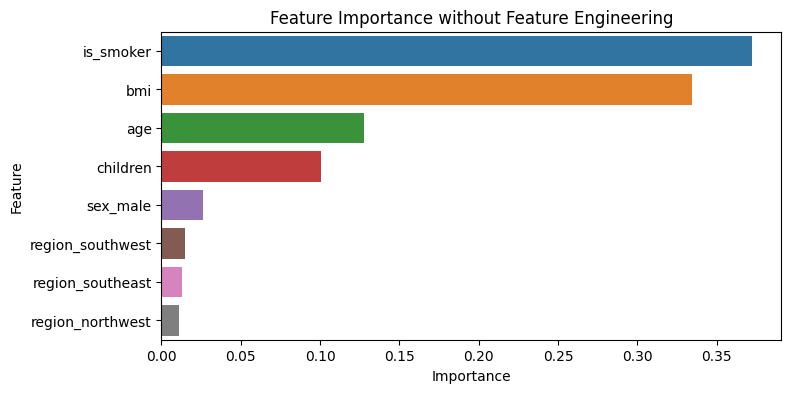

Final Model Accuracy excluding Less Important Region Variables: 0.9115646258503401
Confusion Matrix excluding Less Important Region Variables:
[[189   2   5]
 [  2 179  15]
 [  1  27 168]]
Final Classification Report excluding Less Important Region Variables:
              precision    recall  f1-score   support

        High       0.98      0.96      0.97       196
         Low       0.86      0.91      0.89       196
      Medium       0.89      0.86      0.88       196

    accuracy                           0.91       588
   macro avg       0.91      0.91      0.91       588
weighted avg       0.91      0.91      0.91       588



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


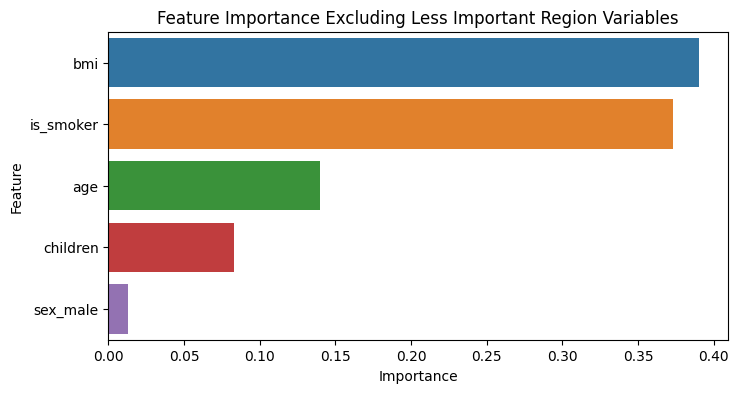

Final Selected Features and their Importance Excluding Less Important Region Variables:
bmi: 0.3901
is_smoker: 0.3734
age: 0.1399
children: 0.0833
sex_male: 0.0133


In [6]:
# Classification Analysis Model 1 and 2 without Feature Engineering


import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and remove duplicates
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df = df.drop_duplicates()

# Define cutoffs for charge groups
low_charge_cutoff = 15000
high_charge_cutoff = 32000

# Assign each record to a charge group based on the defined ranges
df['charge_group'] = pd.cut(df['charges'], bins=[-np.inf, low_charge_cutoff, high_charge_cutoff, np.inf], labels=['Low', 'Medium', 'High'])

# Verify the distribution of groups
print(df['charge_group'].value_counts())

# Data Preparation without Feature Engineering
df['is_smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df_no_fe = pd.get_dummies(df, columns=['region', 'sex'], drop_first=True)

# Normalize the features
scaler = StandardScaler()
X_no_fe = df_no_fe.drop(columns=['charges', 'charge_group', 'smoker'])
X_no_fe_normalized = scaler.fit_transform(X_no_fe)
y_no_fe = df_no_fe['charge_group']

# Address class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_no_fe_resampled, y_no_fe_resampled = smote.fit_resample(X_no_fe_normalized, y_no_fe)

# Split the resampled data into training and testing sets using the same splits
X_train_no_fe, X_test_no_fe, y_train_no_fe, y_test_no_fe = train_test_split(X_no_fe_resampled, y_no_fe_resampled, test_size=0.2, random_state=42, stratify=y_no_fe_resampled)


# Model 1: Classification without Feature Engineering
# Model 1: Train and Evaluate Random Forest without Feature Engineering
clf_no_fe = RandomForestClassifier(random_state=42)
clf_no_fe.fit(X_train_no_fe, y_train_no_fe)
y_test_pred_no_fe = clf_no_fe.predict(X_test_no_fe)

# Model 1: Evaluation
final_accuracy_no_fe = accuracy_score(y_test_no_fe, y_test_pred_no_fe)
print("Final Model Accuracy without Feature Engineering:", final_accuracy_no_fe)
print("Confusion Matrix without Feature Engineering:")
print(confusion_matrix(y_test_no_fe, y_test_pred_no_fe))
print("Final Classification Report without Feature Engineering:")
print(classification_report(y_test_no_fe, y_test_pred_no_fe))

# Model 1: Feature Importance
importances_no_fe = clf_no_fe.feature_importances_
indices_no_fe = np.argsort(importances_no_fe)[::-1]
final_features_no_fe = [X_no_fe.columns[i] for i in indices_no_fe]

# Plot Feature Importance without Feature Engineering
plt.figure(figsize=(8, 4))
sns.barplot(x=importances_no_fe[indices_no_fe], y=final_features_no_fe)
plt.title('Feature Importance without Feature Engineering')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model 2: Classification Excluding Less Important Region Variables

# Data Preparation excluding less important region variables
df_no_fe_dropped = df_no_fe.drop(columns=['region_northwest', 'region_southeast', 'region_southwest'])

# Define features and target excluding less important region variables
X_no_fe_dropped = df_no_fe_dropped.drop(columns=['charges', 'charge_group', 'smoker'])
X_no_fe_normalized_dropped = scaler.fit_transform(X_no_fe_dropped)
y_no_fe_dropped = df_no_fe_dropped['charge_group']

# Address class imbalance with SMOTE
X_no_fe_resampled_dropped, y_no_fe_resampled_dropped = smote.fit_resample(X_no_fe_normalized_dropped, y_no_fe_dropped)

# Use the same train/test split as Model 1
X_train_no_fe_dropped, X_test_no_fe_dropped, y_train_no_fe_dropped, y_test_no_fe_dropped = train_test_split(X_no_fe_resampled_dropped, y_no_fe_resampled_dropped, test_size=0.2, random_state=42, stratify=y_no_fe_resampled_dropped)

# Model 2: Train and Evaluate Random Forest excluding less important region variables
clf_no_fe_dropped = RandomForestClassifier(random_state=42)
clf_no_fe_dropped.fit(X_train_no_fe_dropped, y_train_no_fe_dropped)
y_test_pred_no_fe_dropped = clf_no_fe_dropped.predict(X_test_no_fe_dropped)

# Model 2: Evaluation
final_accuracy_no_fe_dropped = accuracy_score(y_test_no_fe_dropped, y_test_pred_no_fe_dropped)
print("Final Model Accuracy excluding Less Important Region Variables:", final_accuracy_no_fe_dropped)
print("Confusion Matrix excluding Less Important Region Variables:")
print(confusion_matrix(y_test_no_fe_dropped, y_test_pred_no_fe_dropped))
print("Final Classification Report excluding Less Important Region Variables:")
print(classification_report(y_test_no_fe_dropped, y_test_pred_no_fe_dropped))

# Model 2: Feature Importance
importances_no_fe_dropped = clf_no_fe_dropped.feature_importances_
indices_no_fe_dropped = np.argsort(importances_no_fe_dropped)[::-1]
final_features_no_fe_dropped = [X_no_fe_dropped.columns[i] for i in indices_no_fe_dropped]

# Plot Feature Importance excluding Less Important Region Variables
plt.figure(figsize=(8, 4))
sns.barplot(x=importances_no_fe_dropped[indices_no_fe_dropped], y=final_features_no_fe_dropped)
plt.title('Feature Importance Excluding Less Important Region Variables')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# List final selected features and their importance excluding less important region variables
print("Final Selected Features and their Importance Excluding Less Important Region Variables:")
for feature, importance in zip(final_features_no_fe_dropped, importances_no_fe_dropped[indices_no_fe_dropped]):
    print(f"{feature}: {importance:.4f}")


charge_group
Low       979
Medium    203
High      155
Name: count, dtype: int64

Iteration 1
Features: ['age', 'bmi', 'children', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_male', 'age_nonsmoker', 'children_nonsmoker', 'bmi_smoker', 'sex_male_smoker', 'region_northwest_smoker', 'region_southeast_smoker', 'region_southwest_smoker']
Iteration 1 - Average Score: 0.9301830566198382
Feature Importances:
age: 0.0664
bmi: 0.1793
children: 0.0555
is_smoker: 0.1075
region_northwest: 0.0087
region_southeast: 0.0096
region_southwest: 0.0176
sex_male: 0.0229
age_nonsmoker: 0.1602
children_nonsmoker: 0.0610
bmi_smoker: 0.2664
sex_male_smoker: 0.0218
region_northwest_smoker: 0.0043
region_southeast_smoker: 0.0148
region_southwest_smoker: 0.0039
Dropped features in iteration 1: {'region_northwest_smoker', 'region_southwest_smoker', 'region_southeast', 'region_northwest'}

Iteration 2
Features: ['age', 'bmi', 'children', 'is_smoker', 'region_southwest', 'sex_male', 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


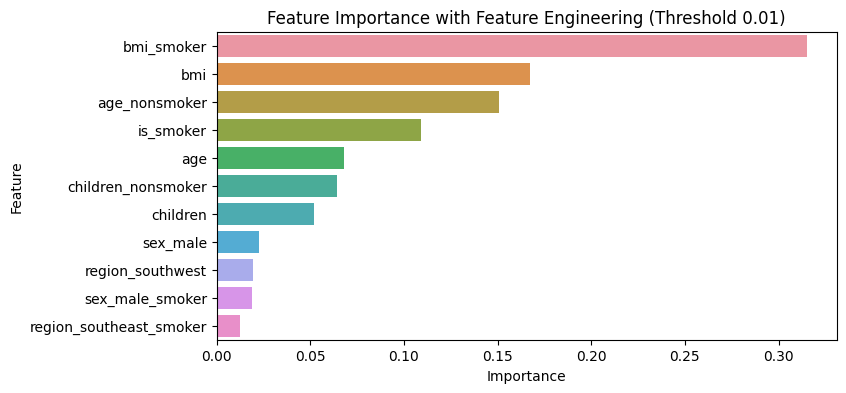

Final Selected Features and their Importance with Feature Engineering (Threshold 0.01):
bmi_smoker: 0.3152
bmi: 0.1671
age_nonsmoker: 0.1509
is_smoker: 0.1092
age: 0.0680
children_nonsmoker: 0.0640
children: 0.0521
sex_male: 0.0228
region_southwest: 0.0194
sex_male_smoker: 0.0186
region_southeast_smoker: 0.0124

Iteration 1
Features: ['age', 'bmi', 'children', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_male', 'age_nonsmoker', 'children_nonsmoker', 'bmi_smoker', 'sex_male_smoker', 'region_northwest_smoker', 'region_southeast_smoker', 'region_southwest_smoker']
Iteration 1 - Average Score: 0.9301830566198382
Feature Importances:
age: 0.0664
bmi: 0.1793
children: 0.0555
is_smoker: 0.1075
region_northwest: 0.0087
region_southeast: 0.0096
region_southwest: 0.0176
sex_male: 0.0229
age_nonsmoker: 0.1602
children_nonsmoker: 0.0610
bmi_smoker: 0.2664
sex_male_smoker: 0.0218
region_northwest_smoker: 0.0043
region_southeast_smoker: 0.0148
region_southwest_smoker

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


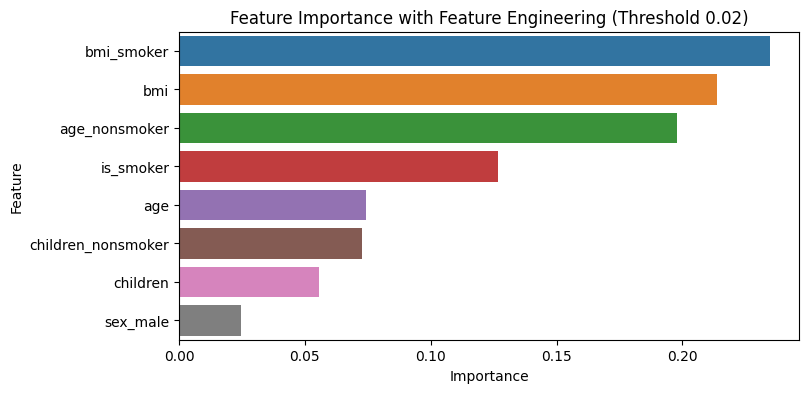

Final Selected Features and their Importance with Feature Engineering (Threshold 0.02):
bmi_smoker: 0.2346
bmi: 0.2137
age_nonsmoker: 0.1980
is_smoker: 0.1266
age: 0.0742
children_nonsmoker: 0.0725
children: 0.0557
sex_male: 0.0246


In [7]:
# Classification Analysis Model 3 and 4 : Classification with Feature Engineering (Threshold 0.01 and 0.02)

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and remove duplicates
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df = df.drop_duplicates()

# Define cutoffs for charge groups
low_charge_cutoff = 15000
high_charge_cutoff = 32000

# Assign each record to a charge group based on the defined ranges
df['charge_group'] = pd.cut(df['charges'], bins=[-np.inf, low_charge_cutoff, high_charge_cutoff, np.inf], labels=['Low', 'Medium', 'High'])

# Verify the distribution of groups
print(df['charge_group'].value_counts())

# Data Preparation
df['is_smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region', 'sex'], drop_first=True)

# Feature Engineering
df['age_nonsmoker'] = df['age'] * (1 - df['is_smoker'])
df['children_nonsmoker'] = df['children'] * (1 - df['is_smoker'])
df['bmi_smoker'] = df['bmi'] * df['is_smoker']
df['sex_male_smoker'] = df['sex_male'] * df['is_smoker']
df['region_northwest_smoker'] = df['region_northwest'] * df['is_smoker']
df['region_southeast_smoker'] = df['region_southeast'] * df['is_smoker']
df['region_southwest_smoker'] = df['region_southwest'] * df['is_smoker']

# Define features and target
X_fe = df.drop(columns=['charges', 'charge_group', 'smoker'])
y = df['charge_group']

# Normalize the features
scaler = StandardScaler()
X_fe_normalized = scaler.fit_transform(X_fe)

# Address class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_fe_resampled, y_resampled = smote.fit_resample(X_fe_normalized, y)

# Split the resampled data into training and testing sets
X_train_fe, X_test_fe, y_train, y_test = train_test_split(X_fe_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Function to perform iterative training and feature selection
def iterative_feature_selection(X, y, threshold=0.01, max_iter=5): # Update the threshold as needed
    selected_features = X.columns.tolist()
    iteration = 1
    best_score = 0
    best_features = selected_features.copy()  # Create a copy of the initial selected features

    while iteration <= max_iter:
        print(f"\nIteration {iteration}")
        print(f"Features: {selected_features}")
        
        # Train the RandomForest model with selected features
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        cv_scores = cross_val_score(clf, X[selected_features], y, cv=cv, scoring='accuracy')
        
        # Fit the model and evaluate
        clf.fit(X[selected_features], y)
        feature_importances = clf.feature_importances_
        mean_cv_score = np.mean(cv_scores)
        print(f"Iteration {iteration} - Average Score: {mean_cv_score}")
        
        # Print feature importance scores
        print("Feature Importances:")
        for feature, importance in zip(selected_features, feature_importances):
            print(f"{feature}: {importance:.4f}")

        # Check if the model improved
        if mean_cv_score > best_score:
            best_score = mean_cv_score
            best_features = selected_features.copy()  # Update best_features to the current selected features

        # Select features with importance above the threshold
        important_features = [feature for feature, importance in zip(selected_features, feature_importances) if importance >= threshold]
        
        # Check if any features were dropped
        dropped_features = set(selected_features) - set(important_features)
        if dropped_features:
            print(f"Dropped features in iteration {iteration}: {dropped_features}")
        else:
            print("No more features to drop based on the threshold.")
            print(f"Current set of features: {selected_features}")
            best_features = selected_features.copy()  # Ensure best_features is updated
            break
        
        selected_features = important_features
        iteration += 1

    print(f"Best features after iteration: {best_features}")
    return best_features, best_score


# Classification Analysis for Model 3: Classification with Feature Engineering (Threshold 0.01)
# Model 3: Perform iterative feature selection
X_train_df = pd.DataFrame(X_train_fe, columns=X_fe.columns)
best_features_01, best_score_01 = iterative_feature_selection(X_train_df, y_train, threshold=0.01)

print(f"Best features selected for Model 3 (Threshold 0.01): {best_features_01}")

# Model 3: Ensure X_test_df is also a DataFrame
X_test_df = pd.DataFrame(X_test_fe, columns=X_fe.columns)

# Model 3: Train final model with selected features
best_model_01 = RandomForestClassifier(random_state=42)
best_model_01.fit(X_train_df[best_features_01], y_train)
y_test_pred_01 = best_model_01.predict(X_test_df[best_features_01])

# Model 3: Final Model Evaluation
final_accuracy_01 = accuracy_score(y_test, y_test_pred_01)
print("Final Model Accuracy with Feature Engineering (Threshold 0.01):", final_accuracy_01)
print("Confusion Matrix with Feature Engineering (Threshold 0.01):")
print(confusion_matrix(y_test, y_test_pred_01))
print("Final Classification Report with Feature Engineering (Threshold 0.01):")
print(classification_report(y_test, y_test_pred_01))

# Model 3: Feature Importance
importances_01 = best_model_01.feature_importances_
indices_01 = np.argsort(importances_01)[::-1]
final_features_01 = [best_features_01[i] for i in indices_01]

# Model 3: Plot Feature Importance
plt.figure(figsize=(8, 4))
sns.barplot(x=importances_01[indices_01], y=final_features_01)
plt.title('Feature Importance with Feature Engineering (Threshold 0.01)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model 3: List final selected features and their importance
print("Final Selected Features and their Importance with Feature Engineering (Threshold 0.01):")
for feature, importance in zip(final_features_01, importances_01[indices_01]):
    print(f"{feature}: {importance:.4f}")

# Classification Analysis for Model 4: Classification with Feature Engineering (Threshold 0.02)

# Model 4: Perform iterative feature selection
best_features_02, best_score_02 = iterative_feature_selection(X_train_df, y_train, threshold=0.02)

print(f"Best features selected for Model 4 (Threshold 0.02): {best_features_02}")

# Model 4: Train final model with selected features
best_model_02 = RandomForestClassifier(random_state=42)
best_model_02.fit(X_train_df[best_features_02], y_train)
y_test_pred_02 = best_model_02.predict(X_test_df[best_features_02])

# Model 4: Final Model Evaluation
final_accuracy_02 = accuracy_score(y_test, y_test_pred_02)
print("Final Model Accuracy with Feature Engineering (Threshold 0.02):", final_accuracy_02)
print("Confusion Matrix with Feature Engineering (Threshold 0.02):")
print(confusion_matrix(y_test, y_test_pred_02))
print("Final Classification Report with Feature Engineering (Threshold 0.02):")
print(classification_report(y_test, y_test_pred_02))

# Model 4: Feature Importance
importances_02 = best_model_02.feature_importances_
indices_02 = np.argsort(importances_02)[::-1]
final_features_02 = [best_features_02[i] for i in indices_02]

# Model 4: Plot Feature Importance
plt.figure(figsize=(8, 4))
sns.barplot(x=importances_02[indices_02], y=final_features_02)
plt.title('Feature Importance with Feature Engineering (Threshold 0.02)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model 4: List final selected features and their importance
print("Final Selected Features and their Importance with Feature Engineering (Threshold 0.02):")
for feature, importance in zip(final_features_02, importances_02[indices_02]):
    print(f"{feature}: {importance:.4f}")


Cross-validation scores (MSE): [38869634.81136537 37427461.84716049 36381747.95010212]
Average cross-validation score (MSE): 37559614.86954266
Train Mean Squared Error: 36979860.90472867
Test Mean Squared Error: 35478020.675235614
Train R^2 Score: 0.7299057809339075
Test R^2 Score: 0.8069287081198011


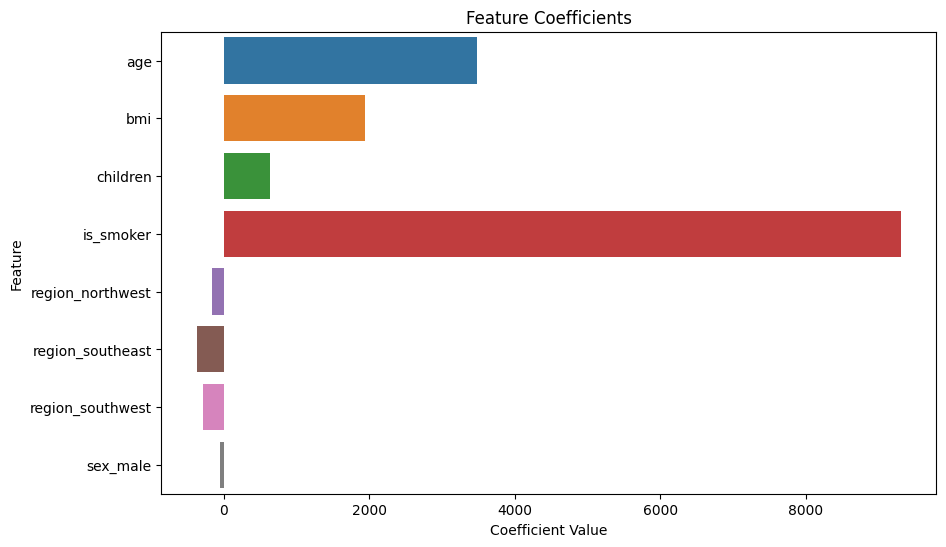

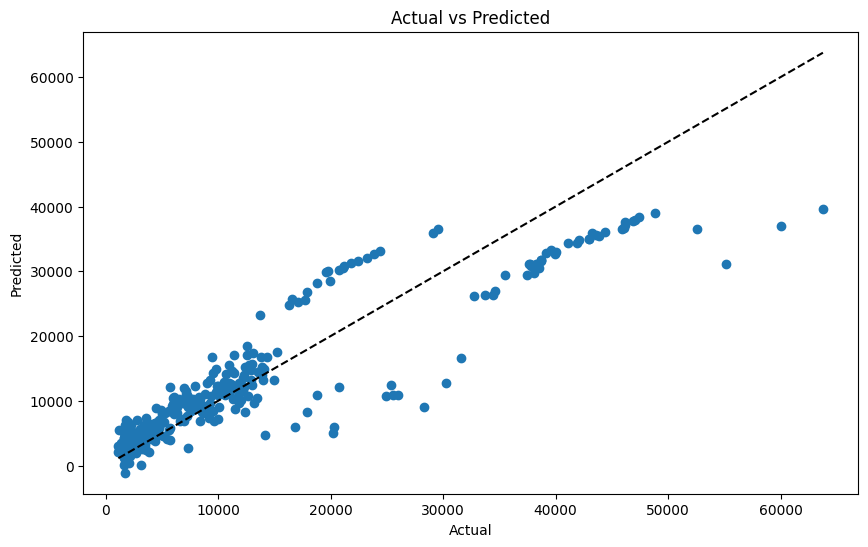

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


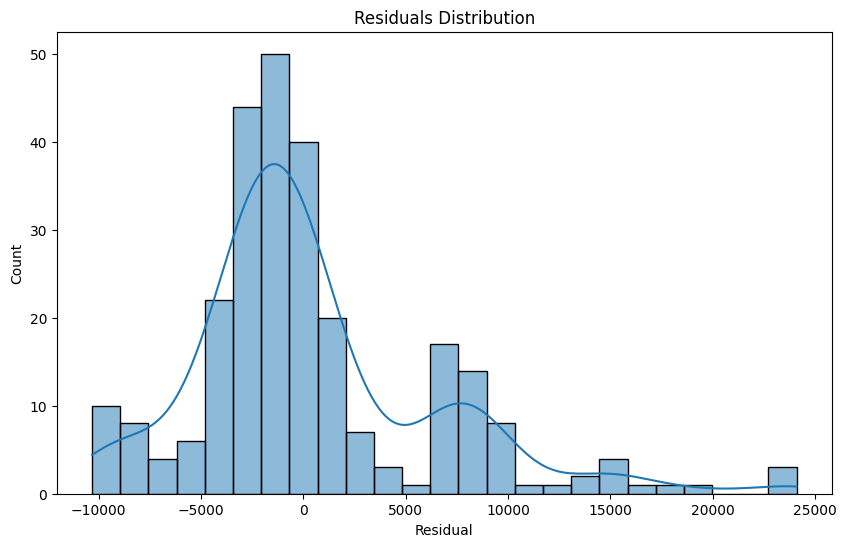

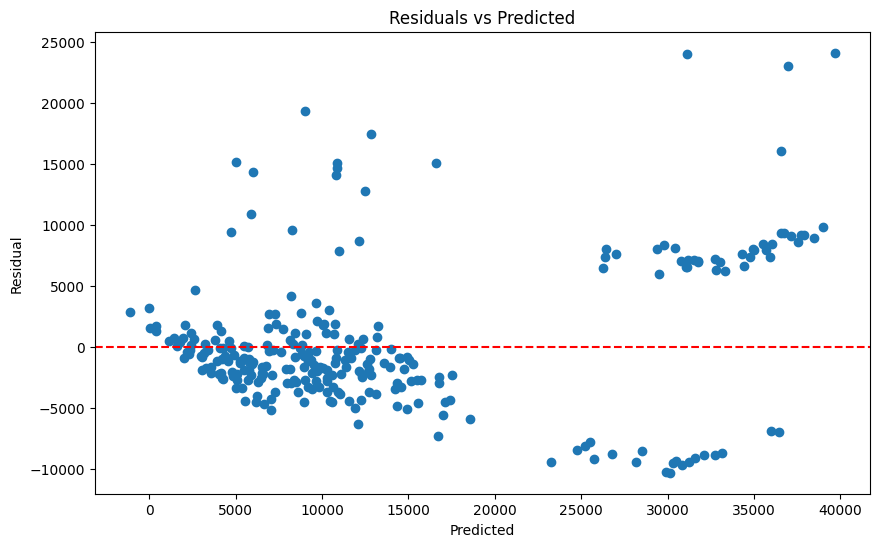

In [8]:
# Regression analysis - Linear Regression model for benchmarking with Random Forrest

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and remove duplicates
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df = df.drop_duplicates()

# Define the features and target variable
df['is_smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region', 'sex'], drop_first=True)
X = df.drop(columns=['charges', 'smoker'])
y = df['charges']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model using cross-validation
lin_regressor = LinearRegression()
cv = 3  # Number of cross-validation folds
cv_scores = cross_val_score(lin_regressor, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
print("Cross-validation scores (MSE):", -cv_scores)
print("Average cross-validation score (MSE):", -np.mean(cv_scores))

# Fit the model on the training set
lin_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = lin_regressor.predict(X_train)
y_test_pred = lin_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Coefficients
coefficients = lin_regressor.coef_
features = df.drop(columns=['charges', 'smoker']).columns

# Plot Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.title('Residuals Distribution')
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.show()


Model 1 Cross-validation scores (MSE): [25683915.59710274 22228279.3974294  25243331.39054846]
Model 1 Average cross-validation score (MSE): 24385175.461693536
Model 1 Train Mean Squared Error: 3590244.2109487797
Model 1 Test Mean Squared Error: 22211917.207949836
Model 1 Train R^2 Score: 0.9737775053045488
Model 1 Test R^2 Score: 0.8791228070547819


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


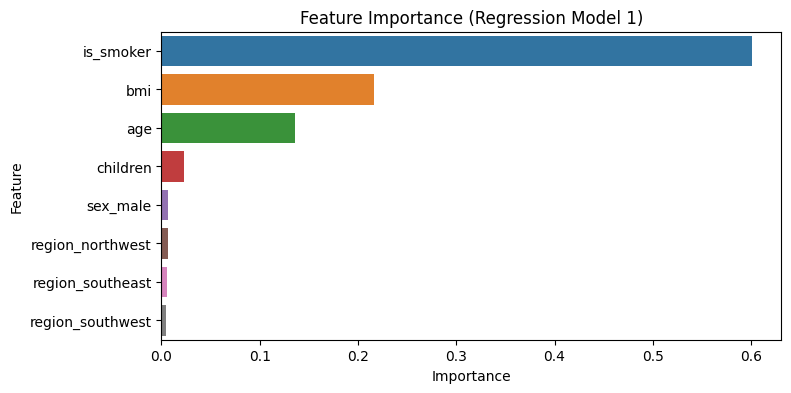

Final Selected Features and their Importance (Regression Model 1):
is_smoker: 0.6008
bmi: 0.2161
age: 0.1357
children: 0.0229
sex_male: 0.0071
region_northwest: 0.0068
region_southeast: 0.0060
region_southwest: 0.0046


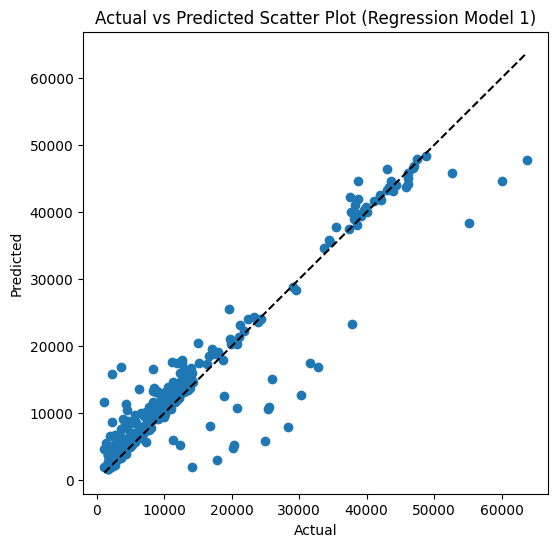

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


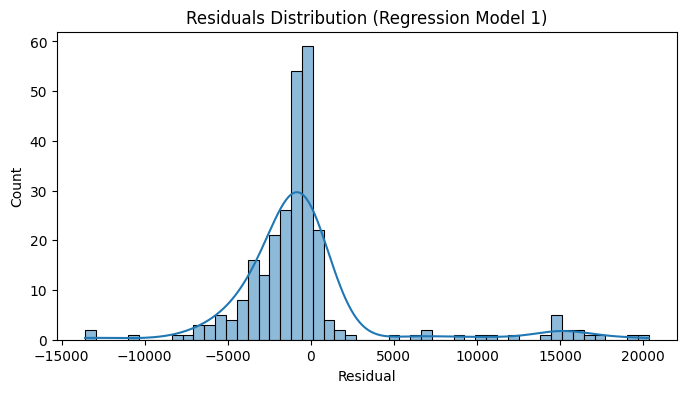

Model 2 Cross-validation scores (MSE): [25821690.507888   22388559.10732133 26589921.63855683]
Model 2 Average cross-validation score (MSE): 24933390.41792205
Model 2 Train Mean Squared Error: 3754183.1167786457
Model 2 Test Mean Squared Error: 23242632.83293563
Model 2 Train R^2 Score: 0.9725801251721913
Model 2 Test R^2 Score: 0.873513655431055


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


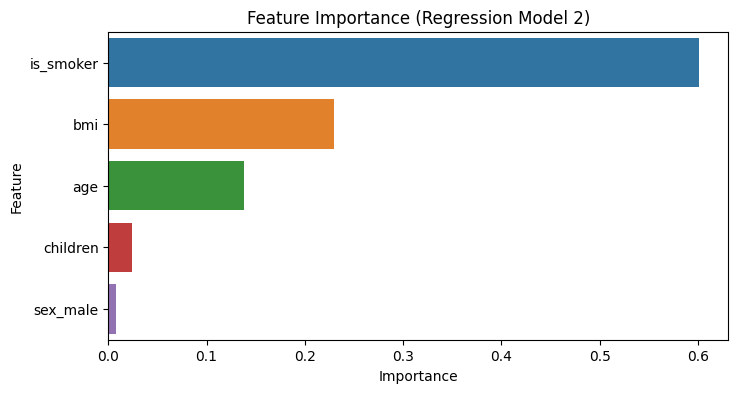

Final Selected Features and their Importance (Regression Model 2):
is_smoker: 0.6008
bmi: 0.2295
age: 0.1379
children: 0.0242
sex_male: 0.0076


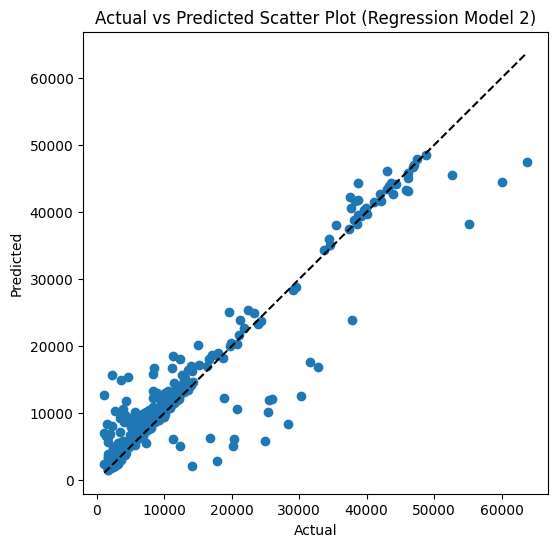

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


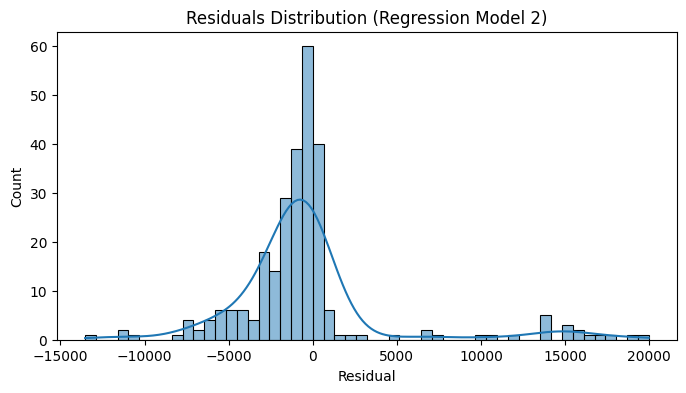

In [11]:
# Regression analysis for Model 1 and Model 2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and remove duplicates
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df = df.drop_duplicates()

# Data Preparation for both models
df['is_smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region', 'sex'], drop_first=True)

# Define features and target variable for Model 1
X1 = df.drop(columns=['charges', 'smoker'])
y = df['charges']

# Define features and target variable for Model 2
X2 = df.drop(columns=['charges', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest'])

# Normalize the features for both models
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)
X2_normalized = scaler.fit_transform(X2)

# Split the data into training and testing sets for both models
X_train1, X_test1, y_train, y_test = train_test_split(X1_normalized, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train, y_test = train_test_split(X2_normalized, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor using cross-validation for both models
rf_regressor = RandomForestRegressor(random_state=42)
cv = 3  # Number of cross-validation folds

# Model 1
cv_scores1 = cross_val_score(rf_regressor, X_train1, y_train, cv=cv, scoring='neg_mean_squared_error')
print("Model 1 Cross-validation scores (MSE):", -cv_scores1)
print("Model 1 Average cross-validation score (MSE):", -np.mean(cv_scores1))

# Fit the model on the training set
rf_regressor.fit(X_train1, y_train)

# Make predictions
y_train_pred1 = rf_regressor.predict(X_train1)
y_test_pred1 = rf_regressor.predict(X_test1)

# Evaluate the model
train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)
train_r21 = r2_score(y_train, y_train_pred1)
test_r21 = r2_score(y_test, y_test_pred1)

print("Model 1 Train Mean Squared Error:", train_mse1)
print("Model 1 Test Mean Squared Error:", test_mse1)
print("Model 1 Train R^2 Score:", train_r21)
print("Model 1 Test R^2 Score:", test_r21)

# Feature importance for Model 1
importances1 = rf_regressor.feature_importances_
indices1 = np.argsort(importances1)[::-1]
final_features1 = [X1.columns[i] for i in indices1]

# Plot Feature Importance for Model 1
plt.figure(figsize=(8, 4))
sns.barplot(x=importances1[indices1], y=final_features1)
plt.title('Feature Importance (Regression Model 1)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# List final selected features and their importance for Model 1
print("Final Selected Features and their Importance (Regression Model 1):")
for feature, importance in zip(final_features1, importances1[indices1]):
    print(f"{feature}: {importance:.4f}")

# Plot Actual vs Predicted Scatter Plot for Model 1
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Scatter Plot (Regression Model 1)')
plt.show()

# Residuals Distribution plot for Model 1
residuals1 = y_test - y_test_pred1
plt.figure(figsize=(8, 4))
sns.histplot(residuals1, kde=True)
plt.xlabel('Residual')
plt.title('Residuals Distribution (Regression Model 1)')
plt.show()

# Model 2
cv_scores2 = cross_val_score(rf_regressor, X_train2, y_train, cv=cv, scoring='neg_mean_squared_error')
print("Model 2 Cross-validation scores (MSE):", -cv_scores2)
print("Model 2 Average cross-validation score (MSE):", -np.mean(cv_scores2))

# Fit the model on the training set
rf_regressor.fit(X_train2, y_train)

# Make predictions
y_train_pred2 = rf_regressor.predict(X_train2)
y_test_pred2 = rf_regressor.predict(X_test2)

# Evaluate the model
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)
train_r22 = r2_score(y_train, y_train_pred2)
test_r22 = r2_score(y_test, y_test_pred2)

print("Model 2 Train Mean Squared Error:", train_mse2)
print("Model 2 Test Mean Squared Error:", test_mse2)
print("Model 2 Train R^2 Score:", train_r22)
print("Model 2 Test R^2 Score:", test_r22)

# Feature importance for Model 2
importances2 = rf_regressor.feature_importances_
indices2 = np.argsort(importances2)[::-1]
final_features2 = [X2.columns[i] for i in indices2]

# Plot Feature Importance for Model 2
plt.figure(figsize=(8, 4))
sns.barplot(x=importances2[indices2], y=final_features2)
plt.title('Feature Importance (Regression Model 2)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# List final selected features and their importance for Model 2
print("Final Selected Features and their Importance (Regression Model 2):")
for feature, importance in zip(final_features2, importances2[indices2]):
    print(f"{feature}: {importance:.4f}")

# Plot Actual vs Predicted Scatter Plot for Model 2
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Scatter Plot (Regression Model 2)')
plt.show()

# Residuals Distribution plot for Model 2
residuals2 = y_test - y_test_pred2
plt.figure(figsize=(8, 4))
sns.histplot(residuals2, kde=True)
plt.xlabel('Residual')
plt.title('Residuals Distribution (Regression Model 2)')
plt.show()
